In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style="whitegrid")

In [3]:
# Load the cleaned dataset
csv_file = "linkedinJobs_cleaned_no_missing.csv"

# Read the CSV file
df = pd.read_csv(csv_file)

# Display dataset overview
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
df.head()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27970 entries, 0 to 27969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        27970 non-null  object
 1   company_name     27970 non-null  object
 2   location         27970 non-null  object
 3   hiring_status    27970 non-null  object
 4   date             27970 non-null  int64 
 5   seniority_level  27970 non-null  object
 6   job_function     27970 non-null  object
 7   employment_type  27970 non-null  object
 8   industry         27970 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.9+ MB
None

First 5 Rows:


,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry
0,store business manager david jones chermside,mj bale,brisbane queensland australia,be an early applicant,20230413,not applicable,sales and business development,fulltime,government administration
1,senior machine learning engineer,redwolf rosch,adelaide south australia australia,be an early applicant,20230425,midsenior level,engineering and information technology,parttime,internet publishing
2,senior data scientist,bupa,melbourne victoria australia,be an early applicant,20230429,entry level,engineering and information technology,fulltime,technology information and internet
3,solution architect,xybion digital,chennai tamil nadu india,be an early applicant,20230126,midsenior level,engineering and information technology,fulltime,it services and it consulting software develop...
4,lead data scientist,spinny,gurugram haryana india,actively hiring,20230224,midsenior level,information technology,fulltime,advertising services


Duplicate Counts Per Column:
job_title          22858
company_name       21913
location           26455
hiring_status      27931
date               27736
seniority_level    27962
job_function       27521
employment_type    27958
industry           27248
dtype: int64


C:\Users\imane\AppData\Local\Temp\ipykernel_20108\3510222639.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values, palette='viridis')


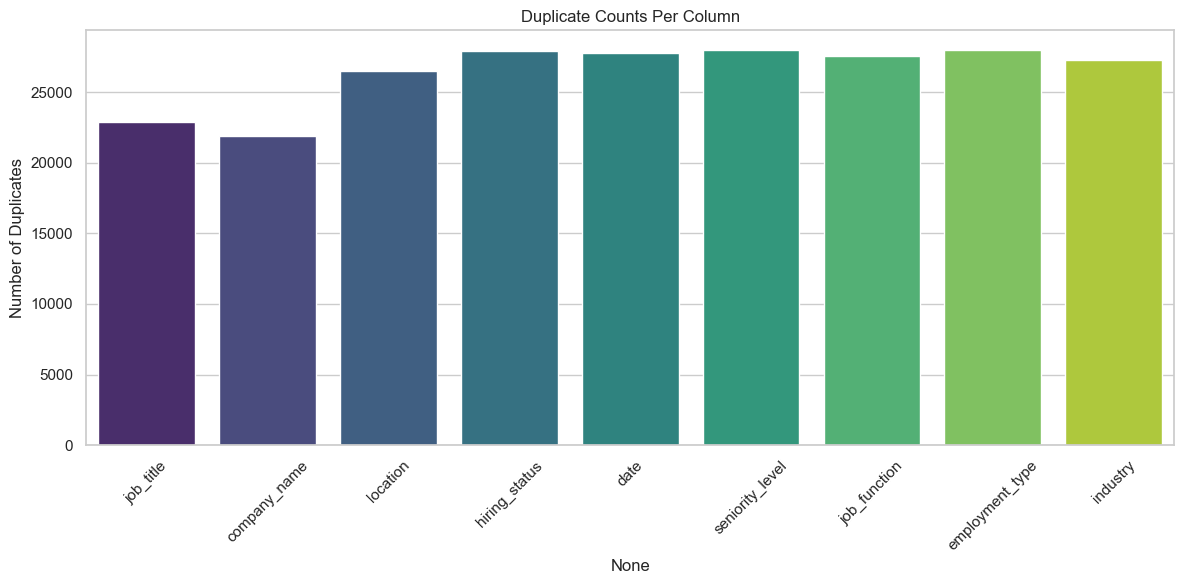

Duplicated Rows:
                                  job_title  \
50     engineering manager blockchain india   
257              embedded firmware engineer   
274                       software engineer   
280              executive assistant to ceo   
292                           data engineer   
...                                     ...   
27961                     dapp engineer mwd   
27964       lead data scientist real estate   
27965                 9099 content writer 1   
27967   embedded security engineer plano tx   
27969                  copywriter freelance   

                                     company_name  \
50                                          bitgo   
257                                  diverse lynx   
274                             sense corporation   
280                                      holiferm   
292                           booz allen hamilton   
...                                           ...   
27961                                 peakwork 

KeyError: Index(['name'], dtype='object')

In [12]:
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Print the number of duplicates per column
print("Duplicate Counts Per Column:")
print(duplicate_counts)

# Visualize duplicates per column
plt.figure(figsize=(12, 6))
sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values, palette='viridis')
plt.title('Duplicate Counts Per Column')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find all duplicated rows in the dataframe
duplicated_rows = df[df.duplicated()]

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicated_rows)

# You can also display only the duplicated entries in a specific column if needed
# Example: Duplicated names
duplicated_names = df[df.duplicated(subset=["name"])]
print("Duplicated Names:")
print(duplicated_names)


Missing Data Per Column:
job_title          0
company_name       0
location           0
hiring_status      0
date               0
seniority_level    0
job_function       0
employment_type    0
industry           0
dtype: int64
Number of rows with missing values in critical columns: 0
Percentage of rows with missing values in critical columns: 0.00%


C:\Users\imane\AppData\Local\Temp\ipykernel_20108\712149003.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")


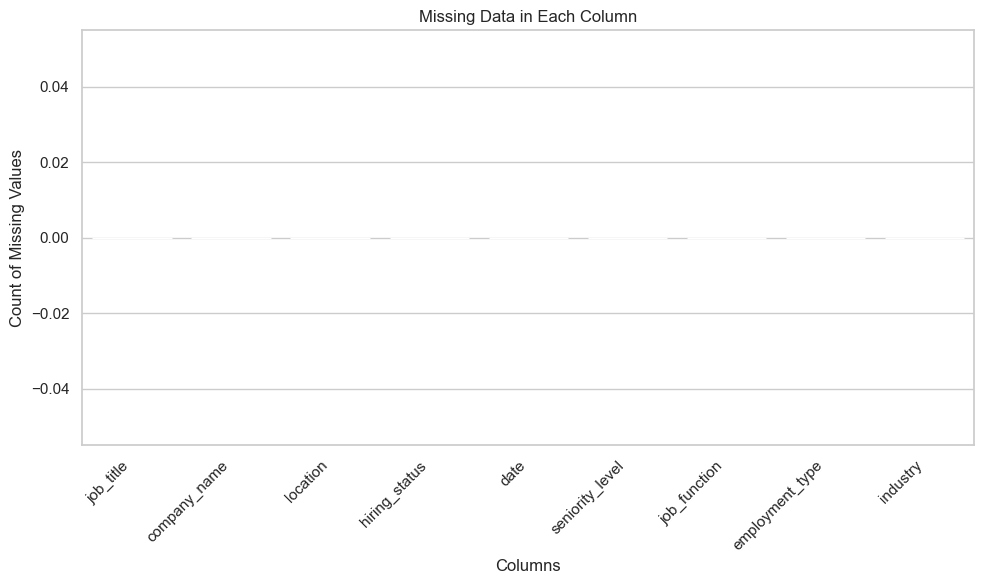

In [4]:
# Calculate missing data per column
missing_data = df.isnull().sum()

# Print missing data statistics
print("Missing Data Per Column:")
print(missing_data)

critical_columns = ["job_title", "company_name", "seniority_level", "job_function", "industry"]
missing_rows = df[critical_columns].isnull().sum(axis=1)

# Count how many rows have missing values in critical columns
rows_with_missing_values = missing_rows[missing_rows > 0].count()
print(f"Number of rows with missing values in critical columns: {rows_with_missing_values}")

# Optionally, calculate the percentage of rows with missing data
total_rows = len(df)
missing_percentage = (rows_with_missing_values / total_rows) * 100
print(f"Percentage of rows with missing values in critical columns: {missing_percentage:.2f}%")

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Missing Data in Each Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()


Top 10 Job Titles:
job_title
full stack developer     827
senior data scientist    738
product manager          673
executive assistant      655
content writer           615
software engineer        539
graphic designer         517
project manager          410
data scientist           372
general manager          280
Name: count, dtype: int64


C:\Users\imane\AppData\Local\Temp\ipykernel_20108\1823835169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="coolwarm")


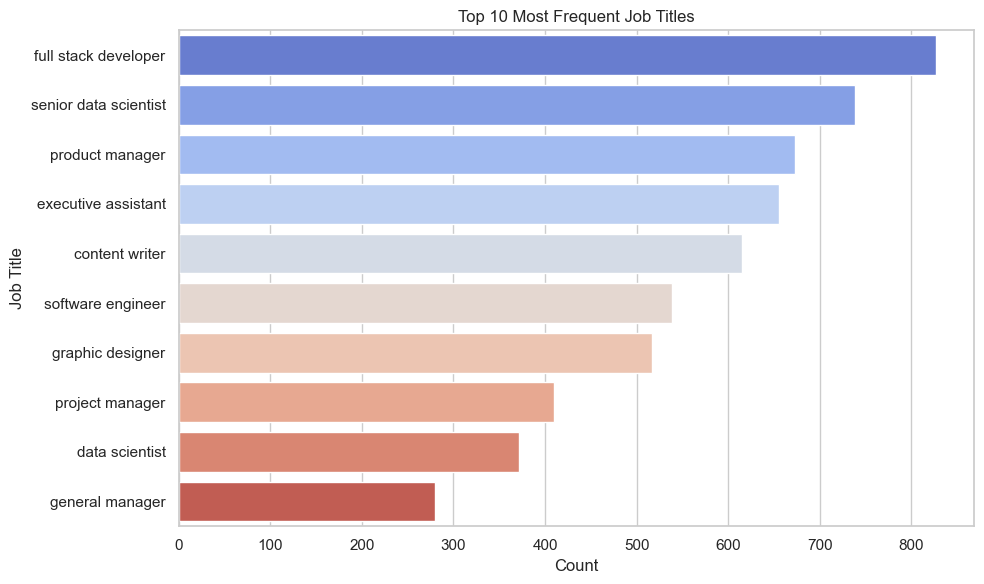

In [5]:
# Top 10 most frequent job titles
top_job_titles = df["job_title"].value_counts().head(10)

# Print the top job titles
print("Top 10 Job Titles:")
print(top_job_titles)

# Bar plot for job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


Top 10 Job Titles with 'Others':
job_title
full stack developer       827
senior data scientist      738
product manager            673
executive assistant        655
content writer             615
software engineer          539
graphic designer           517
project manager            410
data scientist             372
general manager            280
Others                   22344
Name: count, dtype: int64


C:\Users\imane\AppData\Local\Temp\ipykernel_20108\4072045661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="coolwarm")


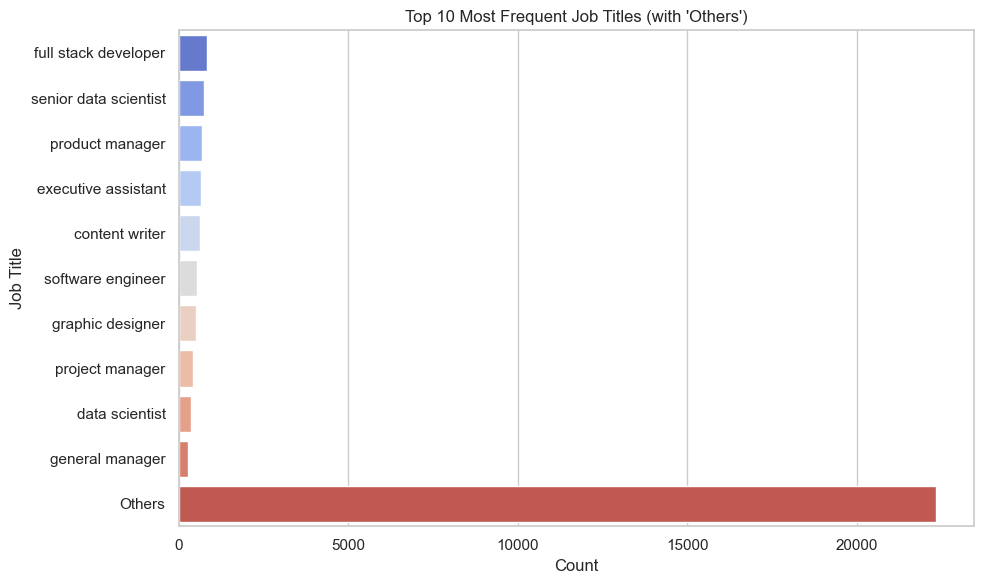

In [6]:
# Top 10 most frequent job titles
top_job_titles = df["job_title"].value_counts().head(10)

# Grouping all other job titles into 'Others'
others_count = df["job_title"].value_counts().iloc[10:].sum()
top_job_titles["Others"] = others_count

# Print the top job titles with "Others"
print("Top 10 Job Titles with 'Others':")
print(top_job_titles)

# Bar plot for job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Job Titles (with 'Others')")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


Top 10 Locations:
location
bengaluru karnataka india           2602
london england united kingdom       2207
mumbai maharashtra india            1132
bengaluru north karnataka india      955
sydney new south wales australia     806
pune maharashtra india               637
indianapolis in                      609
melbourne victoria australia         570
san francisco ca                     563
bengaluru east karnataka india       387
Name: count, dtype: int64


C:\Users\imane\AppData\Local\Temp\ipykernel_20108\53219894.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="muted")


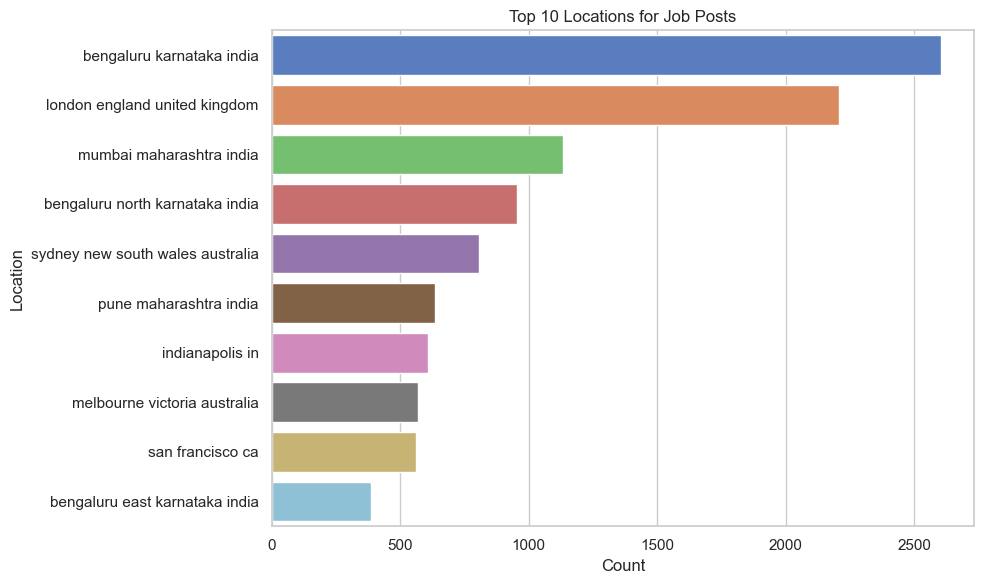

In [7]:
# Top 10 most common locations
top_locations = df["location"].value_counts().head(10)

# Print the top locations
print("Top 10 Locations:")
print(top_locations)

# Bar plot for locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="muted")
plt.title("Top 10 Locations for Job Posts")
plt.xlabel("Count")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


Top 10 Industries:
industry
technology information and internet    3869
it services and it consulting          3243
staffing and recruiting                2931
software development                   1682
internet publishing                    1094
advertising services                    825
financial services                      779
business consulting and services        546
computer hardware manufacturing         504
human resources services                461
Name: count, dtype: int64


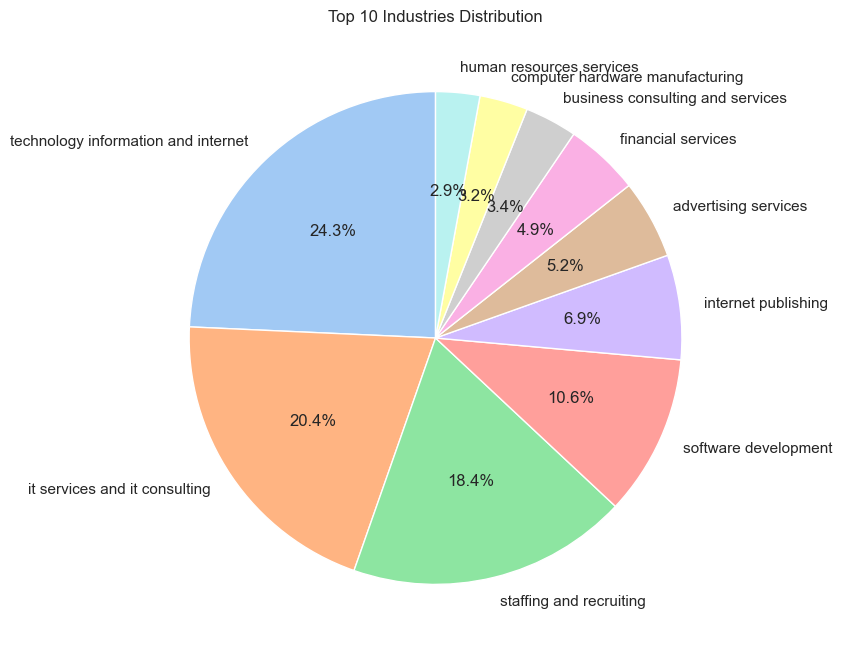

In [8]:
# Top 10 industries
top_industries = df["industry"].value_counts().head(10)

# Print the top industries
print("Top 10 Industries:")
print(top_industries)

# Pie chart for industries
plt.figure(figsize=(8, 8))
top_industries.plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"), startangle=90)
plt.title("Top 10 Industries Distribution")
plt.ylabel("")
plt.show()


Seniority Level Distribution:
seniority_level
midsenior level    12117
entry level         8897
not applicable      2921
associate           2334
executive            837
director             634
internship           229
senior level           1
Name: count, dtype: int64


C:\Users\imane\AppData\Local\Temp\ipykernel_20108\3055255396.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seniority_counts.values, y=seniority_counts.index, palette="cool")


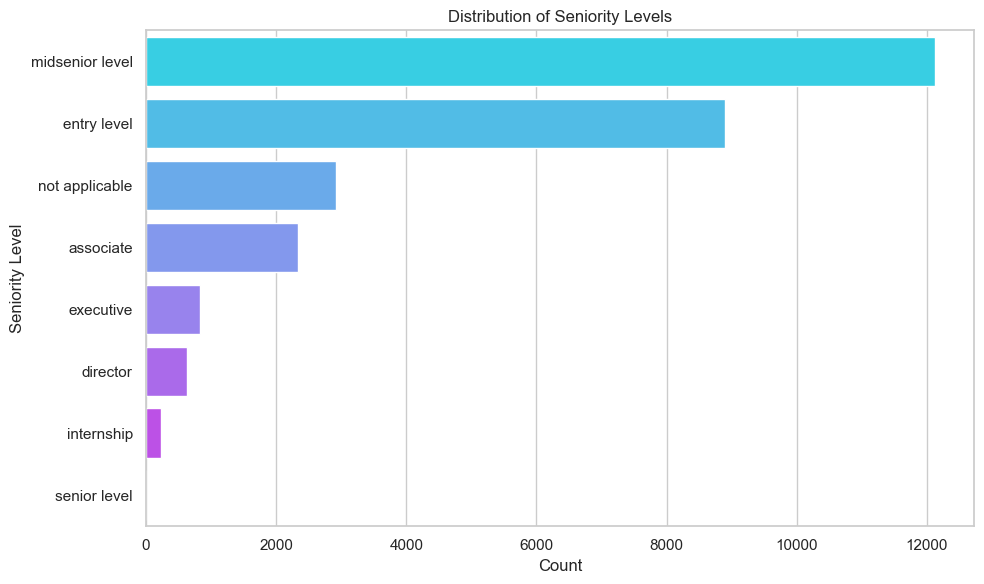

In [9]:
# Seniority level distribution
seniority_counts = df["seniority_level"].value_counts()

# Print seniority level distribution
print("Seniority Level Distribution:")
print(seniority_counts)

# Bar plot for seniority levels
plt.figure(figsize=(10, 6))
sns.barplot(x=seniority_counts.values, y=seniority_counts.index, palette="cool")
plt.title("Distribution of Seniority Levels")
plt.xlabel("Count")
plt.ylabel("Seniority Level")
plt.tight_layout()
plt.show()


Employment Type Distribution:
employment_type
fulltime                      24711
contract                       1958
parttime                        636
employment type fulltime        276
temporary                       129
internship                      113
volunteer                        73
other                            33
employment type internship       24
employment type parttime         12
employment type other             4
employment type contract          1
Name: count, dtype: int64


C:\Users\imane\AppData\Local\Temp\ipykernel_20108\1684461700.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=employment_type_counts.index, x=employment_type_counts.values, palette="magma")


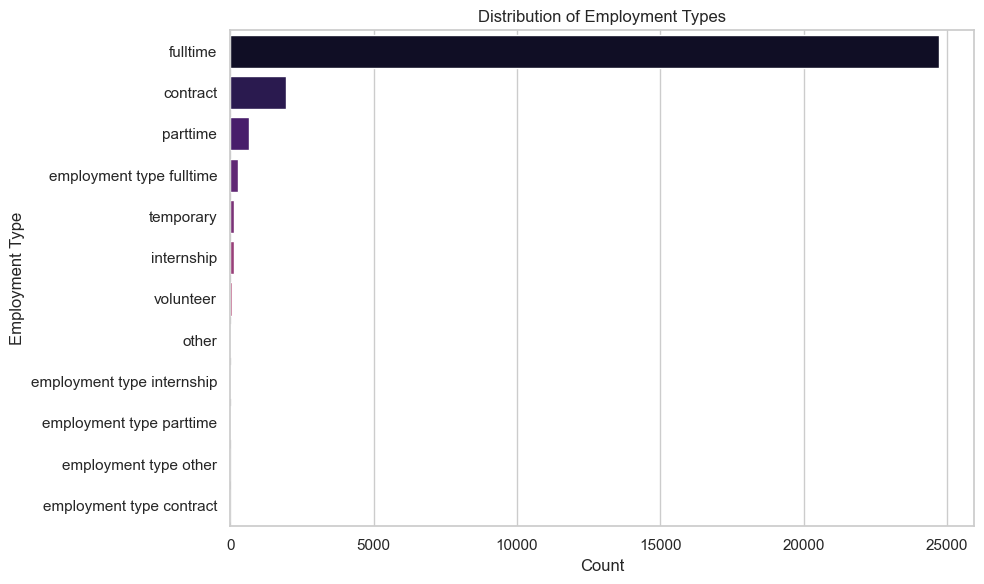

In [10]:
# Employment type distribution
employment_type_counts = df["employment_type"].value_counts()

# Print employment type distribution
print("Employment Type Distribution:")
print(employment_type_counts)

# Horizontal bar plot for employment types
plt.figure(figsize=(10, 6))
sns.barplot(y=employment_type_counts.index, x=employment_type_counts.values, palette="magma")
plt.title("Distribution of Employment Types")
plt.xlabel("Count")
plt.ylabel("Employment Type")
plt.tight_layout()
plt.show()


In [11]:
unique_counts = csv_file.nunique()

# Output the result
print("Number of unique values in each column:")
print(unique_counts)

AttributeError: 'str' object has no attribute 'nunique'